In [1]:
import pennylane as qml
import matplotlib.pyplot as plt
import pennylane.numpy as np
import numpy

In [2]:
qml.drawer.use_style("sketch")

## Turning a Hamiltonian term into a gate

$$
U(H) = e^{-iHt}
$$

### 1) $H_1 = Z$

$$
U = e^{-iZt}
$$

We know $R_Z(\theta) = e^{-i \frac{\theta}{2} Z}$, thus $U = R_Z(2t)$

In [3]:
dev = qml.device("default.qubit", wires=1)

In [4]:
@qml.qnode(dev)
def H_Z(x, t):
    qml.BasisStatePreparation(x, wires=[0])
    qml.RZ(2*t, wires=0)
    return qml.state()

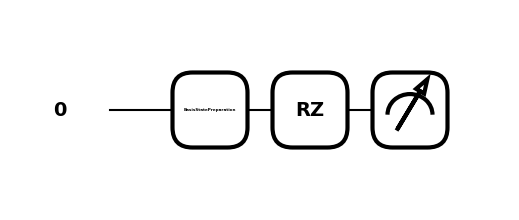

In [5]:
qml.draw_mpl(H_Z)([0], 0)
plt.show()

$$
\begin{aligned}
e^{-iZ\pi}|0\rangle &= e^{-i\pi}|0\rangle = (\cos\pi - i \sin\pi)|0\rangle = -|0\rangle \\
e^{-iZ\pi}|1\rangle &= e^{+i\pi}|1\rangle = (\cos\pi + i \sin\pi)|1\rangle = -|1\rangle
\end{aligned}
$$

In [6]:
H_Z([0], np.pi)

tensor([-1.-1.2246468e-16j,  0.+0.0000000e+00j], requires_grad=True)

In [7]:
H_Z([1], np.pi)

tensor([ 0.+0.0000000e+00j, -1.+1.2246468e-16j], requires_grad=True)

### 2) $H_2 = X$

$$
H Z H = \frac{1}{2} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} = \frac{1}{2} \begin{pmatrix} 1 & -1 \\ 1 & 1 \end{pmatrix} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} = X
$$
Thus,
$$
e^{-iXt} = e^{-iHZHt} = H e^{-iZt} H
$$

In [8]:
@qml.qnode(dev)
def H_X(x, t):
    qml.BasisStatePreparation(x, wires=[0])
    qml.Hadamard(wires=0)
    qml.RZ(2*t, wires=0)
    qml.Hadamard(wires=0)
    return qml.state()

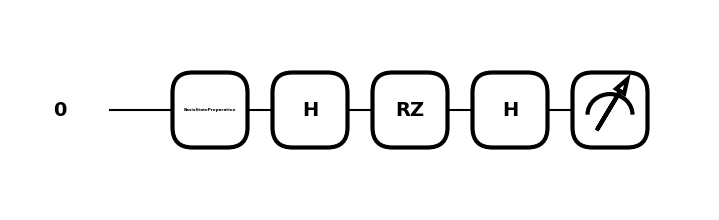

In [9]:
qml.draw_mpl(H_X)([0],0)
plt.show()

$$
\begin{aligned}
He^{-iZt}H|0\rangle &= \frac{1}{\sqrt{2}}He^{-iZt}(|0\rangle + |1\rangle) = \frac{1}{\sqrt{2}}H(e^{-it}|0\rangle + e^{it}|1\rangle) = \frac{1}{2}(e^{-it}(|0\rangle + |1\rangle) + e^{it}(|0\rangle - |1\rangle)) = \frac{e^{it} + e^{-it}}{2}|0\rangle - \frac{e^{it} - e^{-it}}{2}|1\rangle = \cos t|0\rangle -i\sin t|1\rangle \\
He^{-iZt}H|1\rangle &= \frac{1}{\sqrt{2}}He^{-iZt}(|0\rangle - |1\rangle) = \frac{1}{\sqrt{2}}H(e^{-it}|0\rangle - e^{it}|1\rangle) = \frac{1}{2}(e^{-it}(|0\rangle + |1\rangle) - e^{it}(|0\rangle - |1\rangle)) = \frac{e^{it} + e^{-it}}{2}|1\rangle - \frac{e^{it} - e^{-it}}{2}|0\rangle = \cos t|1\rangle -i\sin t|0\rangle
\end{aligned}
$$

In [10]:
H_X([0], np.pi)

tensor([-1.+0.0000000e+00j,  0.-1.2246468e-16j], requires_grad=True)

In [11]:
H_X([0], np.pi/2)

tensor([6.123234e-17+0.j, 0.000000e+00-1.j], requires_grad=True)

In [12]:
H_X([1], np.pi)

tensor([ 0.-1.2246468e-16j, -1.+0.0000000e+00j], requires_grad=True)

In [13]:
H_X([1], np.pi/2)

tensor([0.000000e+00-1.j, 6.123234e-17+0.j], requires_grad=True)

### 3) $H = Z \otimes Z$

$$ e^{-i Z \otimes Z t} = \cos t \mathbb{1} - i \sin t (Z\otimes Z) $$

$$
\begin{aligned}
e^{-i Z\otimes Z t}|00\rangle &= (\cos t - i\sin t)|00\rangle = e^{-it}|00\rangle \\
e^{-i Z\otimes Z t}|01\rangle &= (\cos t + i\sin t)|01\rangle = e^{it}|01\rangle \\
e^{-i Z\otimes Z t}|10\rangle &= (\cos t + i\sin t)|10\rangle = e^{it}|10\rangle \\
e^{-i Z\otimes Z t}|11\rangle &= (\cos t - i\sin t)|11\rangle = e^{-it}|11\rangle
\end{aligned}
$$

- Fix first state, only consider second state : $e^{it}$ or $e^{-it}$ $\Rightarrow$ $e^{-iZt} = R_Z(2t)$
- But different behavior when first state is $0$ or $1$ : $\text{CNOT}$
- But do not change state : Double $\text{CNOT}$

In [14]:
dev2 = qml.device("default.qubit", wires=2)

In [15]:
@qml.qnode(dev2)
def H_ZZ(x, t):
    qml.BasisStatePreparation(x, wires=[0,1])
    qml.CNOT(wires=[0,1])
    qml.RZ(2*t, wires=1)
    qml.CNOT(wires=[0,1])
    return qml.state()

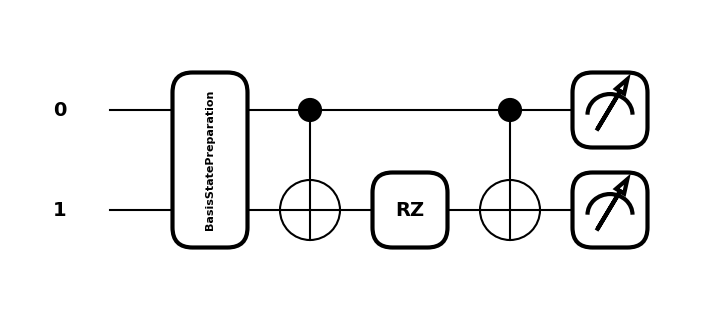

In [16]:
qml.draw_mpl(H_ZZ)([0,0], 0)
plt.show()

In [17]:
H_ZZ([0,0], np.pi/2)

tensor([6.123234e-17-1.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
        0.000000e+00+0.j], requires_grad=True)

In [18]:
H_ZZ([0,1], np.pi/2)

tensor([0.000000e+00+0.j, 6.123234e-17+1.j, 0.000000e+00+0.j,
        0.000000e+00+0.j], requires_grad=True)

In [19]:
H_ZZ([1,0], np.pi/2)

tensor([0.000000e+00+0.j, 0.000000e+00+0.j, 6.123234e-17+1.j,
        0.000000e+00+0.j], requires_grad=True)

In [20]:
H_ZZ([1,1], np.pi/2)

tensor([0.000000e+00+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
        6.123234e-17-1.j], requires_grad=True)

## Overlap of Quantum States

### 1) SWAP Test

**Q.** Is a way to extract $|\langle a | b\rangle|^2$ of tensor product state $|a\rangle \otimes |b\rangle = |a\rangle |b\rangle$?

**A.** "Ancilla qubit"

1. $|0\rangle |a\rangle |b\rangle$
2. $(H|0\rangle) |a\rangle |b\rangle = \dfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) |a\rangle |b\rangle$
3. Apply SWAP gate to $|a\rangle |b\rangle$ when ancilla qubit is $|1\rangle$
4. Apply one more Hadamard gate to ancilla : $\dfrac{1}{2}|0\rangle (|a\rangle |b\rangle + |b\rangle|a\rangle) + \dfrac{1}{2}|1\rangle (|a\rangle |b\rangle - |b\rangle|a\rangle)$
5. Measure ancilla.
   $$ P(|x\rangle = |0\rangle) \equiv p_0 = \frac{1}{4}(\langle a| \langle b| + \langle b|\langle a|)(|a\rangle |b\rangle + |b\rangle|a\rangle) = \frac{1}{4} (1 + \langle a|b\rangle \langle b|a\rangle + \langle b|a\rangle\langle a|b\rangle + 1) = \frac{1}{2} + \frac{1}{2}|\langle a | b\rangle|^2$$
6. Compute $|\langle a | b\rangle|^2 = 2p_0 - 1$

In [21]:
wires = ['a', 'q1', 'q2']
dev3 = qml.device("default.qubit", wires=wires)

In [22]:
@qml.qnode(dev3)
@qml.transforms.merge_amplitude_embedding
def swap_test_circuit(a, b):
    qml.AmplitudeEmbedding(a, wires='q1', normalize=True)
    qml.AmplitudeEmbedding(b, wires='q2', normalize=True)
    qml.Barrier(wires=wires)
    qml.Hadamard(wires='a')
    qml.CSWAP(wires=wires)
    qml.Hadamard(wires='a')
    return qml.probs(wires='a')

$$
|a\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle),~ |b\rangle = |0\rangle
$$

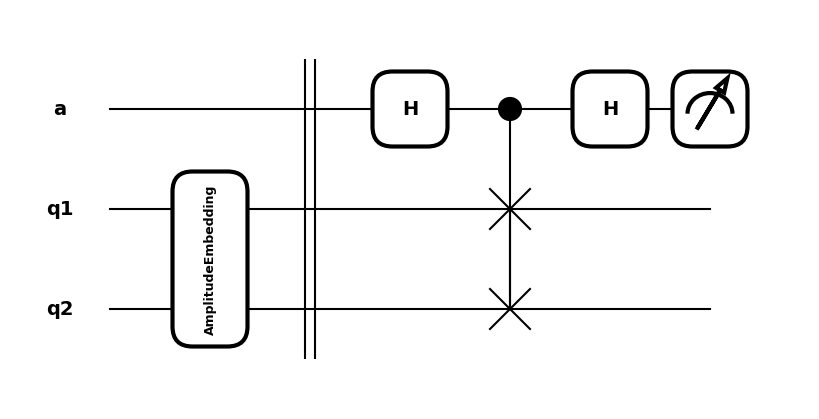

In [23]:
a = np.array([1, 1])
b = np.array([1, 0])
qml.draw_mpl(swap_test_circuit)(a, b)
plt.show()

In [24]:
swap_test_circuit(a, b)

tensor([0.75, 0.25], requires_grad=True)

In [25]:
def swap_test(a, b):
    p0 = swap_test_circuit(a, b)[0]
    return 2*p0 - 1

In [26]:
swap_test(a, b)

tensor(0.5, requires_grad=True)

In [27]:
def cos_sin_state(theta):
    return np.array([np.cos(theta), np.sin(theta)])

def sin_cos_state(theta):
    return np.array([np.sin(theta), np.cos(theta)])

$$
\sin \alpha \cos\beta + \cos\alpha \sin\beta = \sin(\alpha + \beta)
$$

In [28]:
a = sin_cos_state(np.pi / 12)
b = cos_sin_state(np.pi / 6)

swap_test(a, b) # (1/sqrt(2))^2 = 1/2

tensor(0.5, requires_grad=True)

### 2) Hadamard Test

**Q.** Is a more elegant way to measure overlap/scalar product of quantum states?

**A.** **Hadamard Test**
1. Prepare two qubits: one is an ancilla and the other is $|\psi\rangle$. We want to compute $\langle \phi | \psi \rangle$.

2. Apply $H$ to ancilla qubit:
   $$ (H|0\rangle)\otimes |\psi\rangle = |+\rangle \otimes |\psi\rangle = \dfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes |\psi\rangle $$

3. Choose an unitary operator $U$ such that $U|\psi\rangle = |\phi\rangle$ and, apply $\text{CU}$ on $|\psi\rangle$:
   $$ \frac{1}{\sqrt{2}} (|0\rangle \otimes |\psi\rangle + |1\rangle \otimes U |\psi\rangle) = \frac{1}{\sqrt{2}}(|0\rangle \otimes |\psi\rangle + |1\rangle \otimes |\phi\rangle)$$

4. Apply $H$ to ancilla qubit: $\dfrac{1}{2}(|0\rangle \otimes (|\psi\rangle + |\phi\rangle) + |1\rangle \otimes (\psi\rangle - |\phi\rangle))$

5. Measure the probability that ancilla qubit is in zero :
   $$ p_0 = \frac{1}{4} (2 + \langle \psi | \phi \rangle + \langle \phi | \psi \rangle) = \frac{1}{2} + \frac{1}{2} \text{Re}(\langle \phi | \psi \rangle) $$

6. Repeat 2 to 5 but with $\dfrac{1}{\sqrt{2}}(|0\rangle - i|1\rangle) \otimes |\psi\rangle$ :
   $$
   \begin{aligned}
   &\frac{1}{\sqrt{2}}(|0\rangle \otimes |\psi\rangle -i |1\rangle \otimes |\phi\rangle) \overset{H}{\Rightarrow} \frac{1}{2}(|0\rangle \otimes (|\psi\rangle -i |\phi\rangle) + |1\rangle \otimes (|\psi\rangle + i|\phi\rangle)) \\
   \Rightarrow ~&p_0' = \frac{1}{4}(2 + i(\langle \phi | \psi \rangle - \langle \psi | \phi \rangle)) = \frac{1}{2} - \frac{1}{2}\text{Im}(\langle \phi | \psi \rangle)
   \end{aligned}
   $$

7. Therefore, the inner product is :
   $$
   \langle \phi | \psi \rangle = 2 (p_0 - p_0')
   $$

In [29]:
dev_HT = qml.device("default.qubit", wires=['a', 'q'])

Prepare input states.

$$
|\phi\rangle \equiv R_y(2\theta)|\psi\rangle = \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix} \begin{pmatrix} |0_\psi\rangle \equiv \cos\psi \\ |1_\psi\rangle \equiv \sin\psi \end{pmatrix} = \begin{pmatrix} \cos(\theta + \psi) \\ \sin(\theta + \psi) \end{pmatrix} \equiv \begin{pmatrix} \sin \phi \\ \cos \phi \end{pmatrix}
$$

$$
\theta = \frac{\pi}{2} - \psi - \phi
$$

In [30]:
@qml.qnode(dev_HT)
def hadamard_test_circuit(imaginary: bool, psi: float, phi: float):
    theta = np.pi / 2 - psi - phi
    qml.AmplitudeEmbedding(cos_sin_state(psi), wires='q')
    qml.Hadamard(wires='a')
    if imaginary:
        qml.S(wires='a')
        qml.PauliZ(wires='a')
    qml.CRY(2 * theta, wires=['a', 'q'])
    qml.Hadamard(wires='a')
    return qml.probs(wires='a')

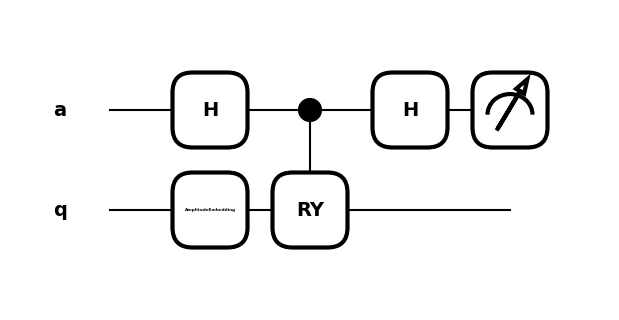

In [31]:
qml.draw_mpl(hadamard_test_circuit)(False, np.pi/6, np.pi/12)
plt.show()

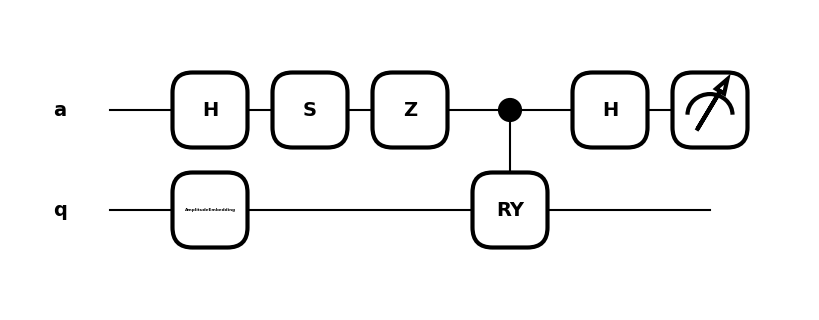

In [32]:
qml.draw_mpl(hadamard_test_circuit)(True, np.pi/6, np.pi/12)
plt.show()

In [33]:
def inner_product_ht(psi, phi):
    p0 = hadamard_test_circuit(False, psi, phi)[0]
    p0_prime = hadamard_test_circuit(True, psi, phi)[0]
    return 2 * (p0 - p0_prime)

In [34]:
inner_product_ht(np.pi/6, np.pi/12)

tensor(0.70710678, requires_grad=True)

In [35]:
1 / np.sqrt(2)

0.7071067811865475